In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import seaborn as sns

In [46]:
df = pd.read_csv('tested.csv')

In [47]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
# 1.st predict age using both algo
# 2. Predict survival using both algo

In [48]:
# null values 
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

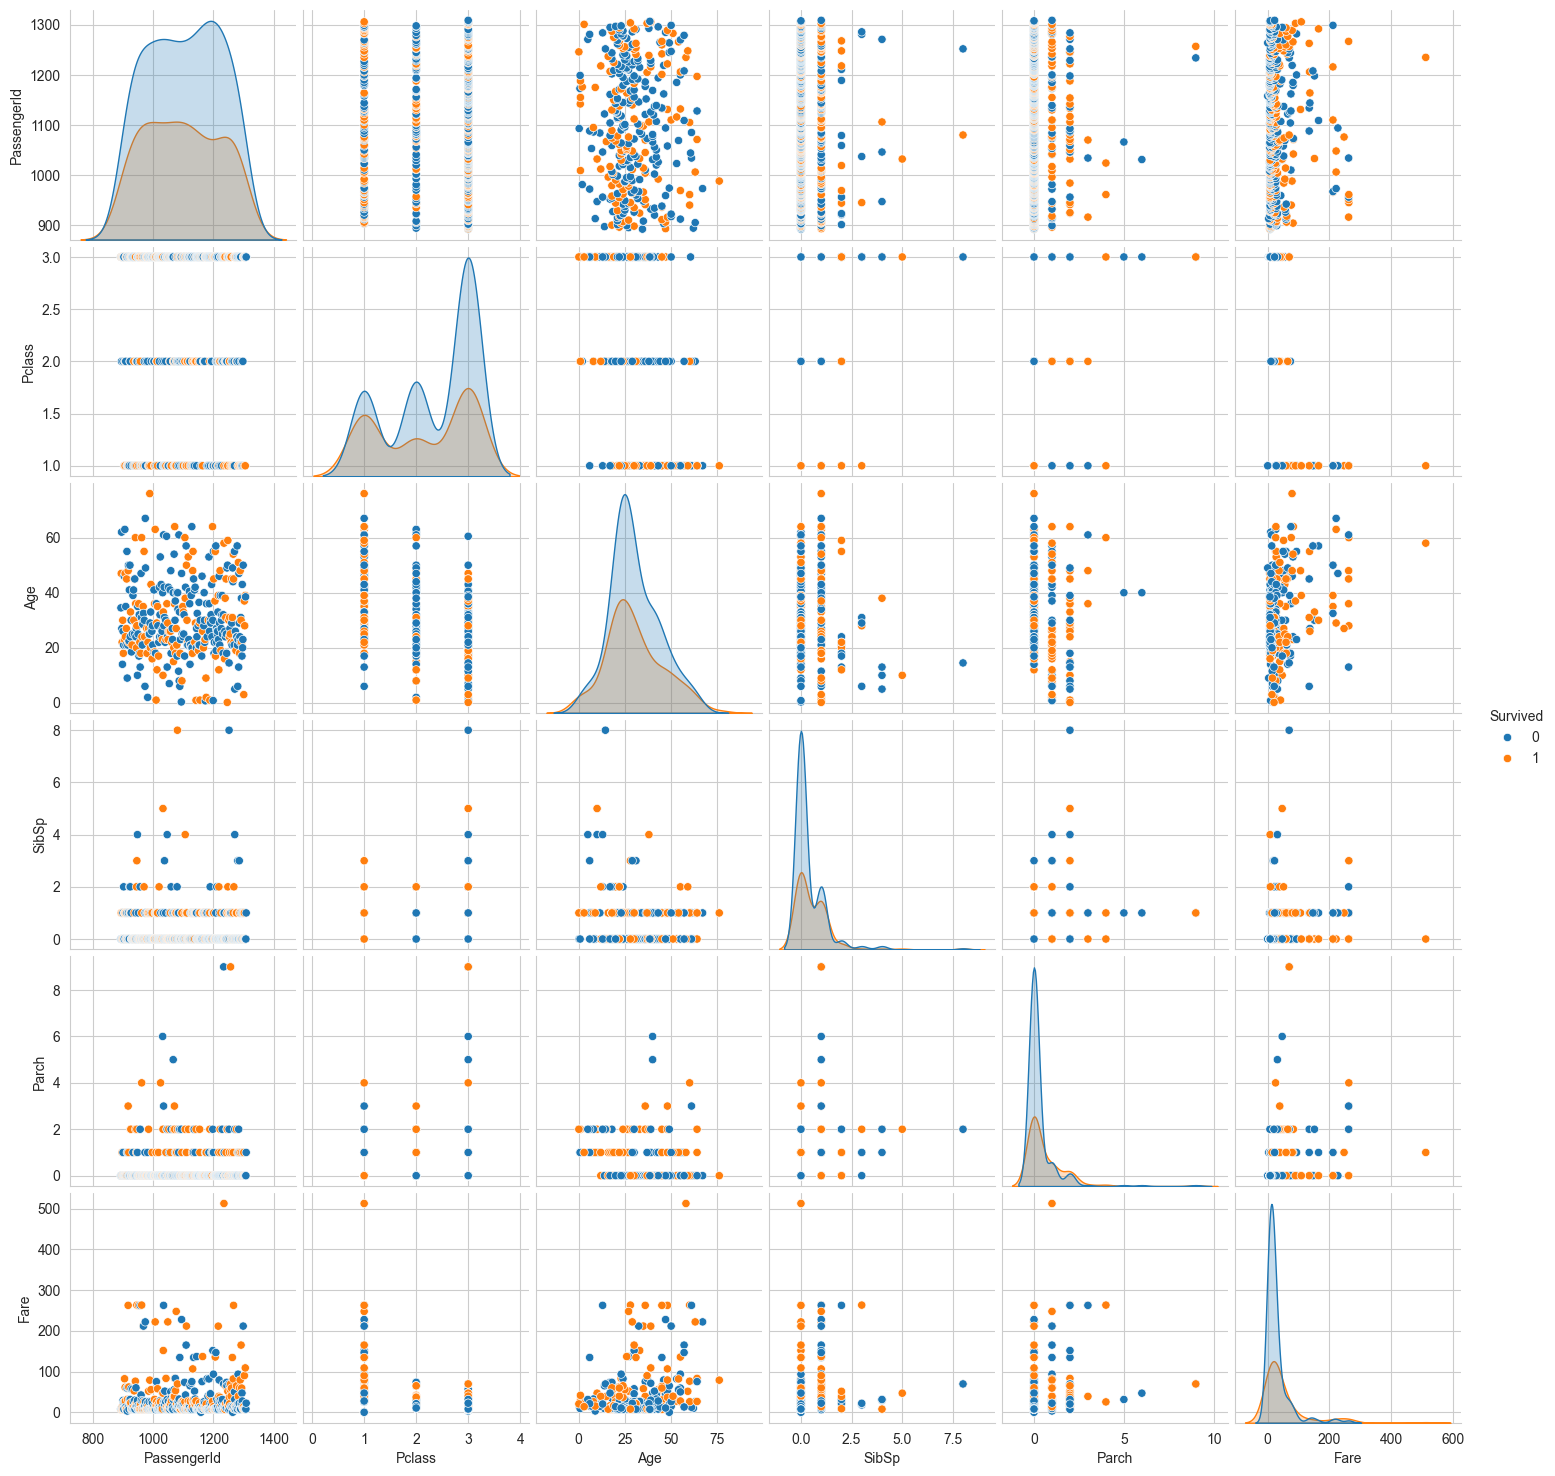

In [49]:
sns.pairplot(df, hue='Survived')
plt.show()

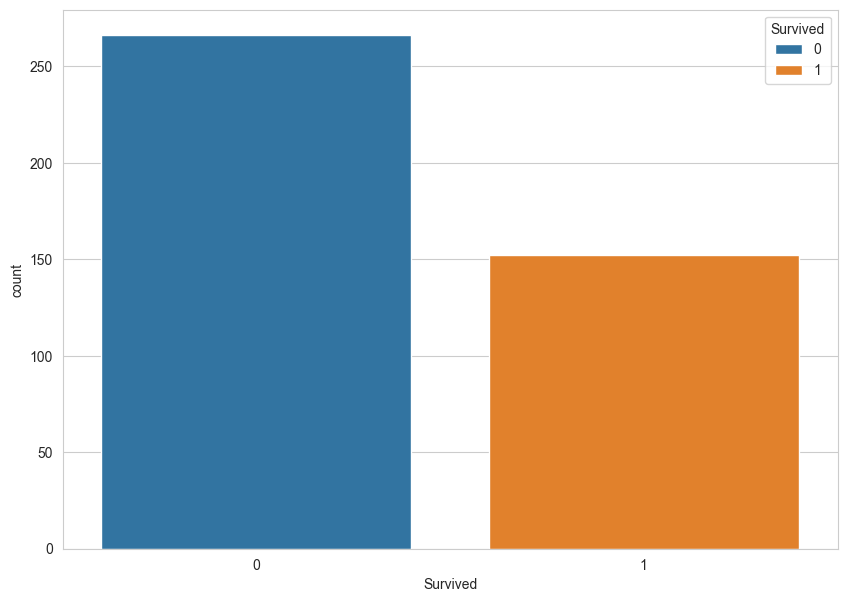

In [50]:
plt.figure(figsize=(10, 7))
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=df,hue='Survived')
plt.show()

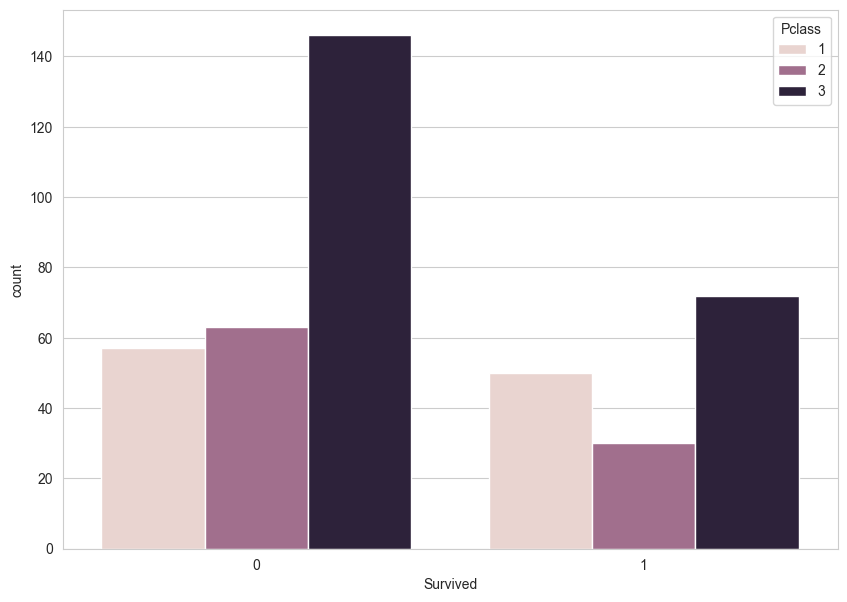

In [51]:
plt.figure(figsize=(10, 7))
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=df)
plt.show()

C:\Users\rudyr\AppData\Local\Temp\ipykernel_13452\4275053994.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'].dropna(),kde=False,color='darkred',bins=30)


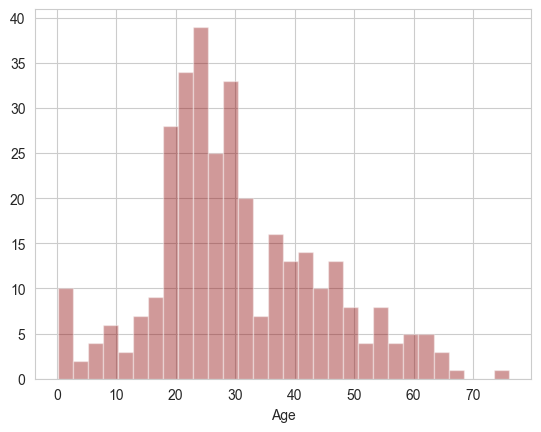

In [52]:
sns.distplot(df['Age'].dropna(),kde=False,color='darkred',bins=30)
plt.show()

<Axes: xlabel='Pclass', ylabel='Age'>

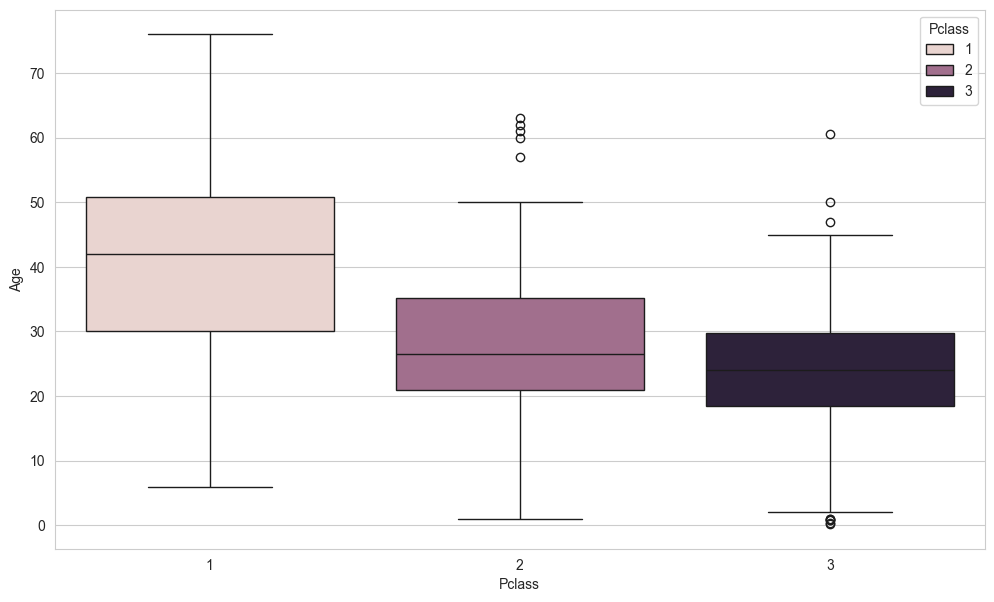

In [54]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=df,hue='Pclass')

In [55]:
# We can see the wealthier passengers in the higher classes tend to be older, which makes sense. We'll use these average age values to impute based on Pclass for Age.
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [56]:
df['Age'] = df[['Age','Pclass']].apply(impute_age,axis=1)

C:\Users\rudyr\AppData\Local\Temp\ipykernel_13452\3102667820.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age = cols[0]
C:\Users\rudyr\AppData\Local\Temp\ipykernel_13452\3102667820.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass = cols[1]


In [57]:
df.drop('Cabin',axis=1,inplace=True)

In [58]:
df.dropna(inplace=True)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 417 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  417 non-null    int64  
 1   Survived     417 non-null    int64  
 2   Pclass       417 non-null    int64  
 3   Name         417 non-null    object 
 4   Sex          417 non-null    object 
 5   Age          417 non-null    float64
 6   SibSp        417 non-null    int64  
 7   Parch        417 non-null    int64  
 8   Ticket       417 non-null    object 
 9   Fare         417 non-null    float64
 10  Embarked     417 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 39.1+ KB


In [60]:
sex = pd.get_dummies(df['Sex'],drop_first=True)
embark = pd.get_dummies(df['Embarked'],drop_first=True)

In [61]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [62]:
df.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [63]:
train = pd.concat([df,sex,embark],axis=1)

In [64]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,892,0,3,34.5,0,0,7.8292,True,True,False
1,893,1,3,47.0,1,0,7.0000,False,False,True
2,894,0,2,62.0,0,0,9.6875,True,True,False
3,895,0,3,27.0,0,0,8.6625,True,False,True
4,896,1,3,22.0,1,1,12.2875,False,False,True


In [65]:
from sklearn.model_selection import train_test_split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), 
                                                    train['Survived'], test_size=0.30, 
                                                    random_state=101)

In [43]:
decision_model = DecisionTreeRegressor()
decision_model.fit(X_train, y_train)

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

decision_predictions = decision_model.predict(X_test)
linear_predictions = linear_model.predict(X_test)

In [44]:
accuracy_decision = decision_model.score(X_test, y_test)
accuracy_linear = linear_model.score(X_test, y_test)

print(f"Decision Tree Accuracy: {accuracy_decision}")
print(f"Linear Regression Accuracy: {accuracy_linear}")

Decision Tree Accuracy: 1.0
Linear Regression Accuracy: 1.0


In [66]:
# now we predict the age using both algo
X_train, X_test, y_train, y_test = train_test_split(train.drop('Age',axis=1), 
                                                    train['Age'], test_size=0.30, 
                                                    random_state=101)

In [67]:
decision_model = DecisionTreeRegressor()
decision_model.fit(X_train, y_train)

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

decision_predictions = decision_model.predict(X_test)
linear_predictions = linear_model.predict(X_test)

In [68]:
accuracy_decision = decision_model.score(X_test, y_test)
accuracy_linear = linear_model.score(X_test, y_test)

print(f"Decision Tree Accuracy: {accuracy_decision}")
print(f"Linear Regression Accuracy: {accuracy_linear}")

Decision Tree Accuracy: -0.3380781058559219
Linear Regression Accuracy: 0.1746707963471461
